## Notebook To Display CO2 Data
Catherine Kuhn , 2018-09-11

## Load Libraries and Data

In [1]:
# start with same libraries as vector tutorial
%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

/root/miniconda/envs/vectorenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
%run -i load_data.py

## View Data

In [3]:
df = co2_data_table
df.head(5)

,Reference,Site Type,Latitude,Longitude,DateTime,Altitude,Discharge,Stream Slope,Width,Depth,...,Air Temperature,DO,Chl a,CO2,k,k600,CO2 Flux,CO2 Flux.1,Source,geometry
0,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.104,1381.28,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
1,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-18.320,1267.75,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
2,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-35.512,1449.39,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
3,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-20.488,1025.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)
4,"Alin and Richey, 2012",small stream,-10.066,-67.606,20040701,150.0,NaN,NaN,NaN,NaN,...,28.1,NaN,NaN,140.5,NaN,-22.272,1411.55,NaN,"Alin, S.R., and J.E. Richey. 2012. LBA-ECO CD-...",POINT (-67.60599999999999 -10.066)


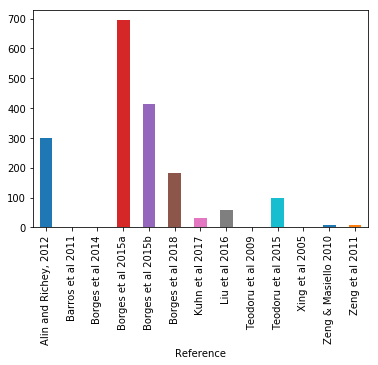

In [4]:
df.groupby(['Reference'])['CO2'].count().plot(kind = 'bar')

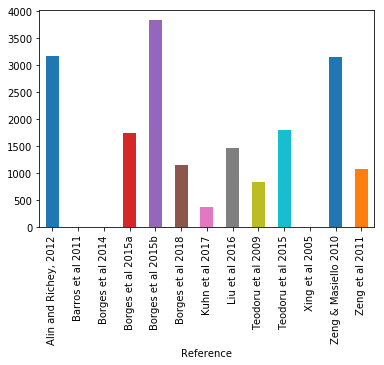

In [5]:
df.groupby(['Reference'])['CO2'].median().plot(kind = 'bar')

In [6]:
#df2 = pd.concat([df['CO2', 'Reference']])

#df2.plot.hist(stacked=True, bins=20)

In [7]:
df.columns

Index(['Reference', 'Site Type', 'Latitude', 'Longitude', 'DateTime',
       'Altitude', 'Discharge', 'Stream Slope', 'Width', 'Depth',
       'Flow Velocity', 'Wind Speed', 'POC', 'DOC', 'TOC', 'pH',
       'Water Temperature', 'Air Temperature', 'DO', 'Chl a', 'CO2', 'k',
       'k600', 'CO2 Flux', 'CO2 Flux.1', 'Source', 'geometry'],
      dtype='object')

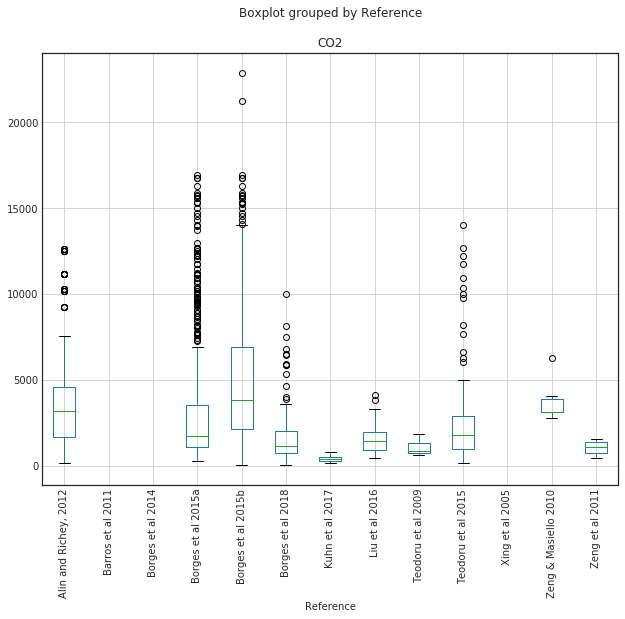

In [8]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['CO2'], by='Reference', ax=ax)
plt.xticks(rotation=90)
plt.show()

load_data.py:3: RuntimeWarning: divide by zero encountered in log
  # setup script to load data and put into friendly database


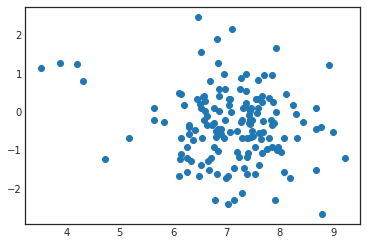

In [9]:
import numpy as np
x = np.log(df['CO2'])
y = np.log(df['Chl a'])
plt.scatter(x, y)

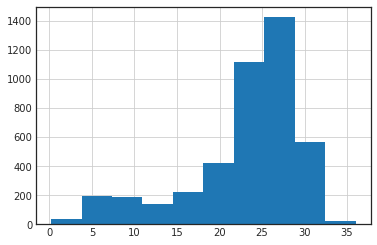

In [10]:
df['Water Temperature'].hist()

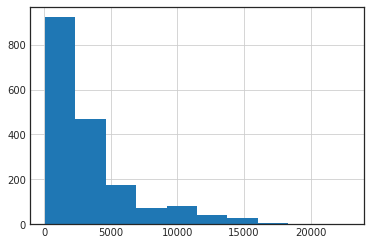

In [11]:
df['CO2'].hist()

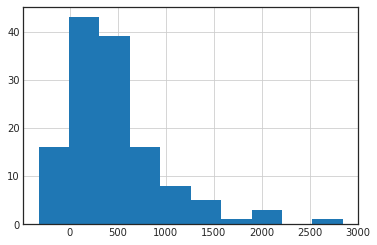

In [12]:
df['CO2 Flux.1'].hist()

Text(0,0.5,'CO2 Flux')

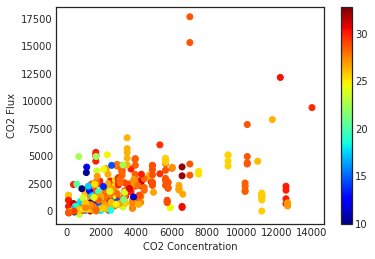

In [13]:
plt.scatter(df.CO2 , df['CO2 Flux'], c=df['Water Temperature'], cmap='jet')

plt.colorbar()

plt.xlabel('CO2 Concentration')
plt.ylabel('CO2 Flux')

## Bring in COSCAT regions

In [14]:
data_pth = "../data/hess_GIS/"

In [15]:
coscat = gpd.read_file(os.path.join(data_pth, "Continental_Shelf.shp"))
continents = gpd.read_file(os.path.join(data_pth, "Continents.shp"))

In [16]:
coscat.head(1)

,COSCAT,MARCATS,geometry
0,1,20,(POLYGON ((-5.449999809265137 35.9333343505859...


In [17]:
coscat.crs

{'init': 'epsg:4326'}

In [18]:
len(continents.COSCAT.unique())

231

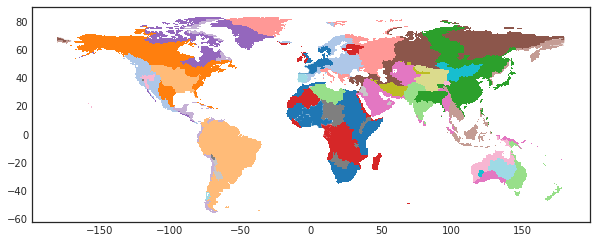

In [19]:
continents.plot(cmap='tab20', figsize=(10, 10));

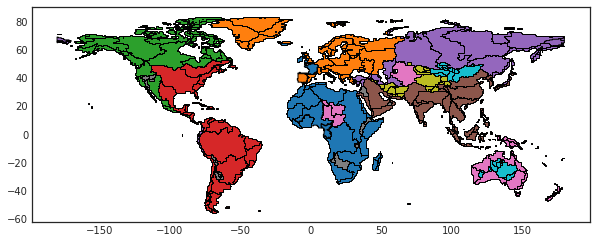

In [21]:
continents.plot(column='COSCAT',categorical=True,  edgecolor='black', figsize=(10, 10));